In [85]:
import os
import cv2
import numpy as np

dir_path = './dataset/'

def load_dataset():
    # Load images and labels
    images = []
    labels = []

    shape = (62, 108)
    
    for filename in os.listdir(os.path.join(dir_path)):
        img = cv2.imread(os.path.join(dir_path, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape == shape:
            images.append(img)
            
            if 'false' in filename:
                labels.append(0)
            else:
                labels.append(1)
    
    X = np.array(images)
    y = np.array(labels)
    
    X = X[..., np.newaxis]
    
    return X, y

In [86]:
X, y = load_dataset()

X.shape, y.shape

((282, 62, 108, 1), (282,))

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalMaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

# Create a CNN model
model = Sequential()

# Add a convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(62, 108, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())
# Replace the Flatten layer with GlobalMaxPooling2D
# model.add(GlobalMaxPooling2D())

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
8/8 [==============================] - 5s 332ms/step - loss: 80.7538 - accuracy: 0.5422 - val_loss: 2.6565 - val_accuracy: 0.3684
Epoch 2/15
8/8 [==============================] - 2s 272ms/step - loss: 1.8081 - accuracy: 0.5689 - val_loss: 0.6062 - val_accuracy: 0.7193
Epoch 3/15
8/8 [==============================] - 2s 283ms/step - loss: 0.5969 - accuracy: 0.6711 - val_loss: 0.5545 - val_accuracy: 0.6667
Epoch 4/15
8/8 [==============================] - 2s 279ms/step - loss: 0.5264 - accuracy: 0.6267 - val_loss: 0.5434 - val_accuracy: 0.6667
Epoch 5/15
8/8 [==============================] - 2s 277ms/step - loss: 0.6700 - accuracy: 0.6889 - val_loss: 0.7254 - val_accuracy: 0.6491
Epoch 6/15
8/8 [==============================] - 2s 265ms/step - loss: 0.3656 - accuracy: 0.8311 - val_loss: 0.3319 - val_accuracy: 0.8070
Epoch 7/15
8/8 [==============================] - 2s 271ms/step - loss: 0.2009 - accuracy: 0.9378 - val_loss: 0.2452 - val_accuracy: 0.9123
Epoch 8/15
8/8 [===

In [90]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 60, 106, 64)       640       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 51, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 25, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 22400)             0         
                                                                 
 dense_20 (Dense)            (None, 64)              

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.2013 - accuracy: 0.9474 - 164ms/epoch - 82ms/step


In [92]:
y_pred = model.predict(X_test)
y_pred.shape

2/2 [==============================] - 0s 64ms/step


(57, 1)

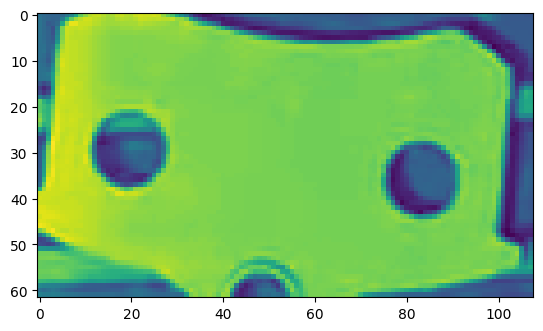

1 [1.]


In [93]:
import matplotlib.pyplot as plt

i = 13

plt.imshow(X_test[i])
plt.show()

print(y_test[i], y_pred[i])

In [94]:
model.save('models/model_v3.h5')

In [95]:
from tensorflow.keras.models import load_model

loaded_model = load_model('models/model_v3.h5')